# END CAPSTONE ( CUSTOMER SENTIMENT ANALYSIS )

# PYTHON CLASS CUSTOMER THAT REPRESENTS A CUSTOMER AND INCLUDES METHODS TO CALCULATE CLV AND SEGMENT THE CUSTOMER BASED ON THEIR PURCHASING BEHAVIOR

In [ ]:
import pandas as pd

# DEFINE CUSTOMER CLASS
class Customer:
    def __init__(self, name, email, age, gender, total_purchases, total_spent, customer_since):
        self.name = name
        self.email = email
        self.age = age
        self.gender = gender
        self.total_purchases = total_purchases
        self.total_spent = total_spent
        self.customer_since = customer_since

    def calculate_clv(self):
        """CALCULATE CUSTOMER LIFETIME VALUE (CLV)."""
        current_year = pd.Timestamp.now().year
        years_as_customer = current_year - self.customer_since
        if years_as_customer > 0:
            clv = self.total_spent / years_as_customer
        else:
            clv = self.total_spent
        return round(clv, 2)

    def segment_customer(self):
        """SEGMENT CUSTOMER BASED ON PURCHASING BEHAVIOR."""
        if self.total_spent >= 10000:
            return "Premium"
        elif self.total_spent >= 5000:
            return "Loyal"
        elif self.total_spent >= 1000:
            return "Regular"
        else:
            return "Occasional"

    def display_info(self):
        """DISPLAY CUSTOMER INFORMATION."""
        info = f"Name: {self.name}\nEmail: {self.email}\nAge: {self.age}\nGender: {self.gender}\n"
        info += f"Total Purchases: {self.total_purchases}\nTotal Spent: ${self.total_spent}\n"
        info += f"Customer Since: {self.customer_since}\nCLV: ${self.calculate_clv()}\n"
        info += f"Segment: {self.segment_customer()}"
        return info


# SETTING UP THE FILE
file_path = "/content/drive/MyDrive/END_CAPSTONE(DS-2).xlsx"
data_1 = pd.read_excel(file_path, sheet_name='CS-DATA-1')

# CREATING A CUSTOMER INSTANCE FROM THE FIRST ROW OF DATA IN CS-DATA-1
customer_example = Customer(
    name=data_1.loc[0, 'Name'],
    email=data_1.loc[0, 'Email'],
    age=data_1.loc[0, 'Age'],
    gender=data_1.loc[0, 'Gender'],
    total_purchases=data_1.loc[0, 'Total Purchases'],
    total_spent=data_1.loc[0, 'Total Spent'],
    customer_since=data_1.loc[0, 'Customer Since']
)

# DISPLAY CUSTOMER INFORMATION
customer_info = customer_example.display_info()
print(customer_info)


Name: Katie Smith
Email: katie.smith@hotmail.com
Age: 40
Gender: Male
Total Purchases: 38
Total Spent: $5423.18
Customer Since: 2017
CLV: $774.74
Segment: Loyal


# IMPLEMENT A TIMING_DECORATOR AND APPLY IT TO THE CALCULATE_CLVMETHOD OF THE CUSTOMER CLASS TO LOG EXECUTION TIME.

In [ ]:
import time

# DEFINE THE TIMING DECORATOR
def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Execution time for {func.__name__}: {execution_time:.6f} seconds")
        return result
    return wrapper


# SETTING UP THE FILE PATH
file_path = "/content/drive/MyDrive/END_CAPSTONE(DS-2).xlsx"
data_1 = pd.read_excel(file_path, sheet_name='CS-DATA-1')

# CREATING A CUSTOMER INSTANCE FROM THE FIRST ROW OF DATA IN CS-DATA-1
customer_example = Customer(
    name=data_1.loc[0, 'Name'],
    email=data_1.loc[0, 'Email'],
    age=data_1.loc[0, 'Age'],
    gender=data_1.loc[0, 'Gender'],
    total_purchases=data_1.loc[0, 'Total Purchases'],
    total_spent=data_1.loc[0, 'Total Spent'],
    customer_since=data_1.loc[0, 'Customer Since']
)

# DISPLAY CUSTOMER INFORMATION AND CHECK THE EXECUTION TIME OF CALCULATE_CLV
customer_info = customer_example.display_info()
print(customer_info)


Execution time for calculate_clv: 0.000082 seconds
Name: Katie Smith
Email: katie.smith@hotmail.com
Age: 40
Gender: Male
Total Purchases: 38
Total Spent: $5423.18
Customer Since: 2017
CLV: $774.74
Segment: Loyal


# WRITE A GENERATOR FUNCTION TO ITERATE OVER LARGE DATASETS AND YIELD CUSTOMER RECORDS ONE AT A TIME. INTEGRATE THIS GENERATOR INTO THE CUSTOMER CLASS TO PROCESS DATA MEMORY-EFFICIENTLY.

In [ ]:
import pandas as pd
import time

# DEFINE THE TIMING DECORATOR
def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Execution time for {func.__name__}: {execution_time:.6f} seconds")
        return result
    return wrapper

# DEFINE A GENERATOR FUNCTION TO YIELD CUSTOMER RECORDS FROM A LARGE EXCEL DATASET
def customer_record_generator(file_path, sheet_name, chunk_size=1000):
    """Generator function to read and yield customer records from a large dataset."""
    start_row = 0
    while True:
        chunk = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=start_row, nrows=chunk_size)
        if chunk.empty:
            break
        start_row += chunk_size
        for _, row in chunk.iterrows():
            yield row

# DEFINE CUSTOMER CLASS
class Customer:
    def __init__(self, name, email, age, gender, total_purchases, total_spent, customer_since):
        self.name = name
        self.email = email
        self.age = age
        self.gender = gender
        self.total_purchases = total_purchases
        self.total_spent = total_spent
        self.customer_since = customer_since

    @timing_decorator
    def calculate_clv(self):
        """CALCULATE CUSTOMER LIFETIME VALUE (CLV)."""
        current_year = pd.Timestamp.now().year
        years_as_customer = current_year - self.customer_since
        if years_as_customer > 0:
            clv = self.total_spent / years_as_customer
        else:
            clv = self.total_spent
        return round(clv, 2)

    def segment_customer(self):
        """SEGMENT CUSTOMER BASED ON PURCHASING BEHAVIOR."""
        if self.total_spent >= 10000:
            return "Premium"
        elif self.total_spent >= 5000:
            return "Loyal"
        elif self.total_spent >= 1000:
            return "Regular"
        else:
            return "Occasional"

    def display_info(self):
        """DISPLAY CUSTOMER INFORMATION."""
        info = f"Name: {self.name}\nEmail: {self.email}\nAge: {self.age}\nGender: {self.gender}\n"
        info += f"Total Purchases: {self.total_purchases}\nTotal Spent: ${self.total_spent}\n"
        info += f"Customer Since: {self.customer_since}\nCLV: ${self.calculate_clv()}\n"
        info += f"Segment: {self.segment_customer()}"
        return info

    @classmethod
    def process_customers(cls, file_path, sheet_name):
        """PROCESS CUSTOMER RECORDS USING A GENERATOR FUNCTION."""
        customer_gen = customer_record_generator(file_path, sheet_name)
        for record in customer_gen:
            customer_instance = cls(
                name=record['Name'],
                email=record['Email'],
                age=record['Age'],
                gender=record['Gender'],
                total_purchases=record['Total Purchases'],
                total_spent=record['Total Spent'],
                customer_since=record['Customer Since']
            )
            print(customer_instance.display_info())
            print("-" * 50)

# THE CUSTOMER CLASS WITH THE GENERATOR
file_path = "/content/drive/MyDrive/END_CAPSTONE(DS-2).xlsx"

# DISPLAY CUSTOMER RECORDS ONE AT A TIME USING THE GENERATOR
Customer.process_customers(file_path, sheet_name='CS-DATA-1')


Execution time for calculate_clv: 0.000053 seconds
Name: Katie Smith
Email: katie.smith@hotmail.com
Age: 40
Gender: Male
Total Purchases: 38
Total Spent: $5423.18
Customer Since: 2017
CLV: $774.74
Segment: Loyal
--------------------------------------------------
Execution time for calculate_clv: 0.000034 seconds
Name: David Smith
Email: david.smith@hotmail.com
Age: 40
Gender: Female
Total Purchases: 54
Total Spent: $8292.73
Customer Since: 2019
CLV: $1658.55
Segment: Loyal
--------------------------------------------------
Execution time for calculate_clv: 0.000041 seconds
Name: Sarah Jones
Email: sarah.jones@yahoo.com
Age: 36
Gender: Female
Total Purchases: 90
Total Spent: $8270.97
Customer Since: 2014
CLV: $827.1
Segment: Loyal
--------------------------------------------------
Execution time for calculate_clv: 0.000031 seconds
Name: Chris Moore
Email: chris.moore@yahoo.com
Age: 22
Gender: Male
Total Purchases: 22
Total Spent: $4891.91
Customer Since: 2019
CLV: $978.38
Segment: Regul

# SUMMARY STATISTICS, VISUALIZATIONS, AND CORRELATION MATRICES TO EXPLORE RELATIONSHIPS BETWEEN VARIABLES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# LOAD THE DATASET FROM EXCEL
file_path = "/content/drive/MyDrive/END_CAPSTONE(DS-2).xlsx"
df = pd.read_excel(file_path, sheet_name='CS-DATA-1')

# GENERATE SUMMARY STATISTICS
summary_statistics = df.describe()
print(summary_statistics)


              Age  Total Purchases  Total Spent  Customer Since
count  100.000000       100.000000   100.000000      100.000000
mean    42.180000        50.000000  4829.193000     2017.480000
std     15.582547        27.891203  2958.068726        3.841506
min     18.000000         2.000000   112.120000     2010.000000
25%     30.000000        27.750000  2018.805000     2014.000000
50%     41.000000        47.500000  5078.085000     2018.000000
75%     56.250000        73.000000  7213.442500     2021.000000
max     70.000000        99.000000  9843.330000     2023.000000


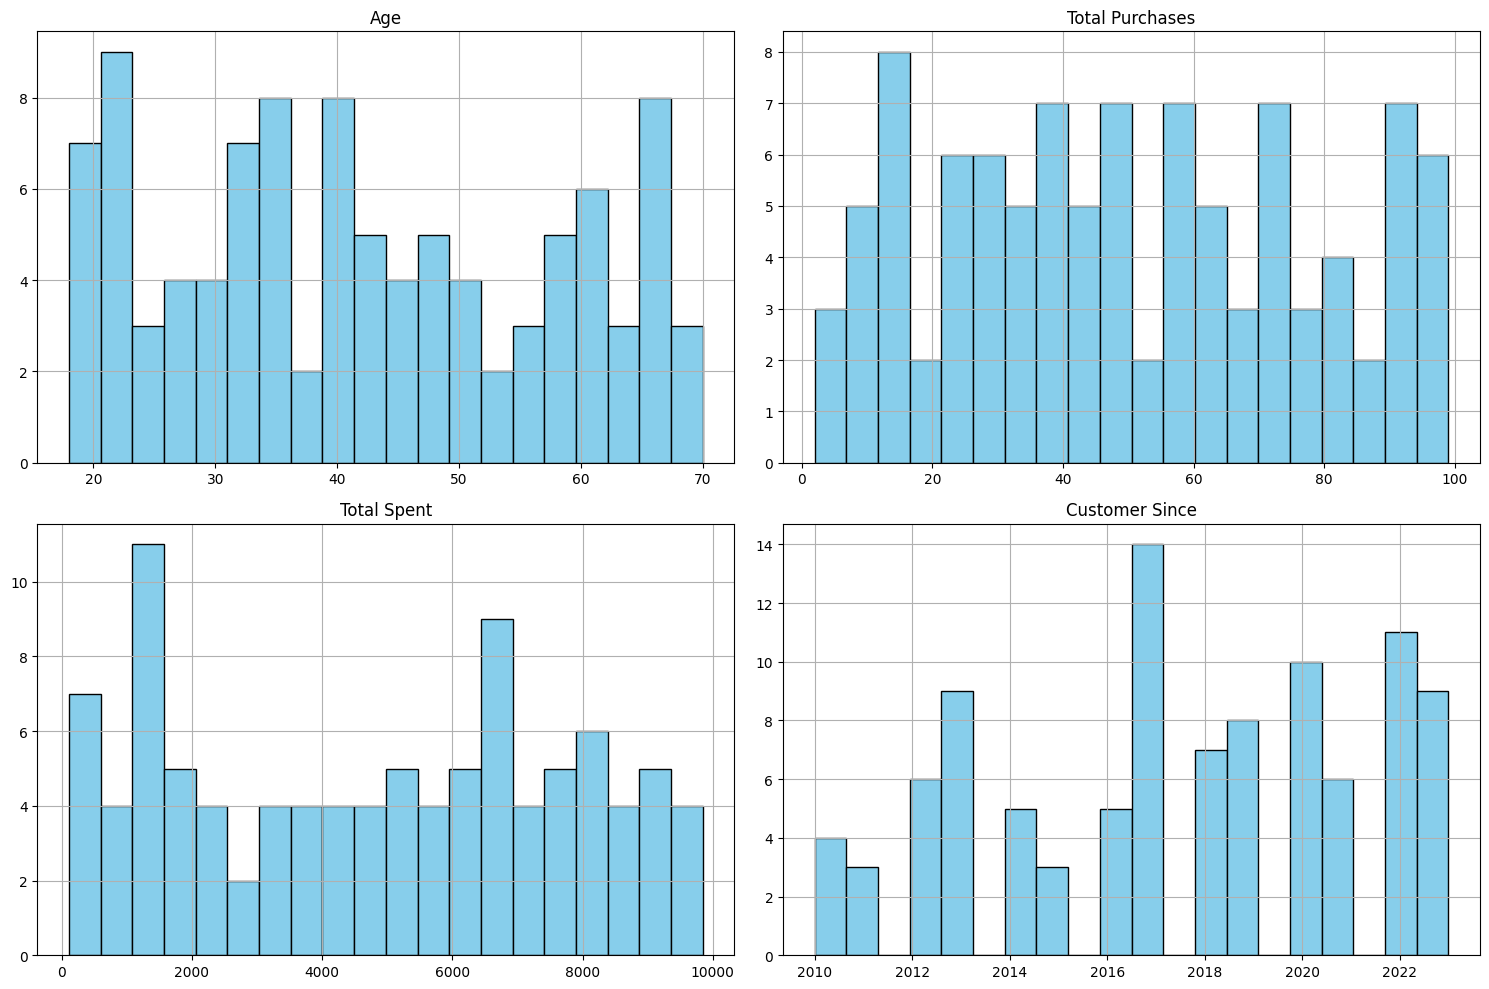

In [ ]:
# HISTOGRAM FOR ALL NUMERICAL VALUES
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

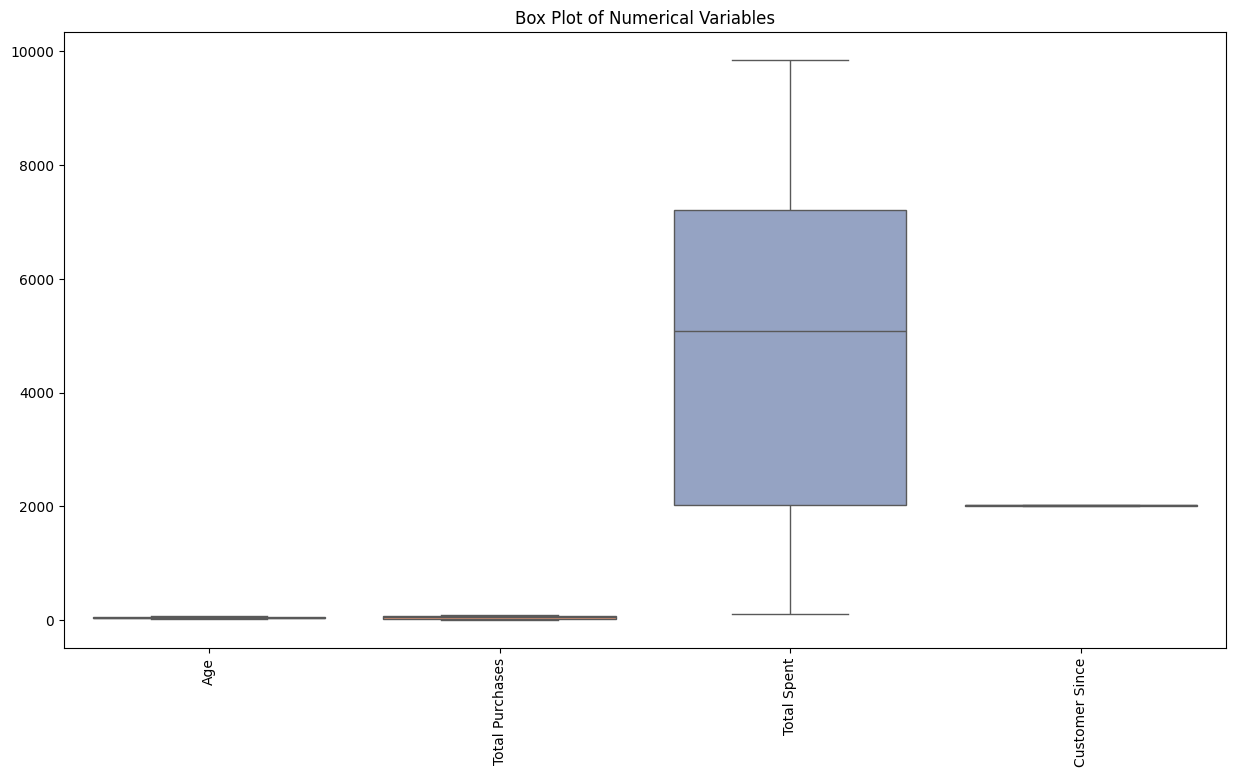

In [ ]:
# BOX PLOT FOR ALL NUMERICAL VALUES
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=np.number), palette='Set2')
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Variables')
plt.show()


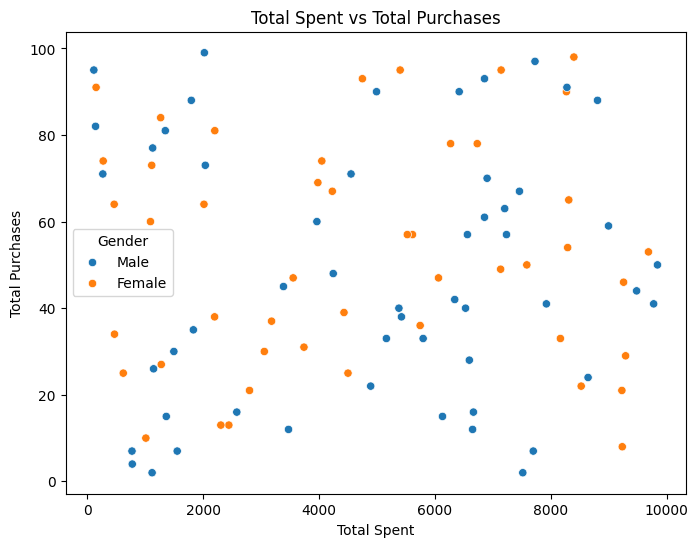

In [ ]:
# SCATTER PLOT: TOTAL SPENT VS TOTAL PURCHASES
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total Spent', y='Total Purchases', hue='Gender')
plt.title('Total Spent vs Total Purchases')
plt.show()


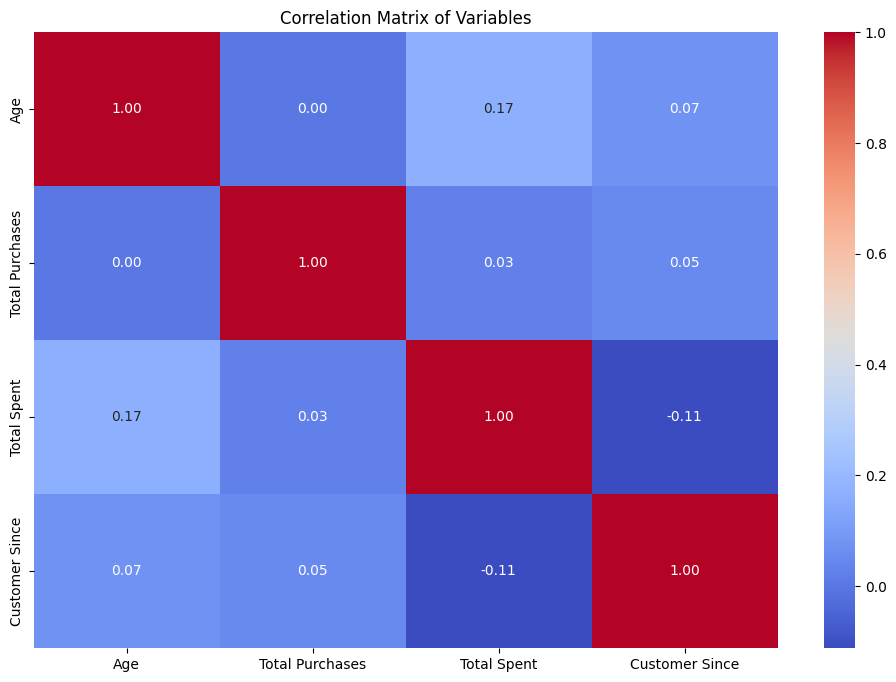

In [ ]:
# CORRELATION MATRIX
correlation_matrix = df.corr(numeric_only=True)
# DISPLAY THE CORRELATION MATRIX
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# IPY WIDGETS WILL CREATE INTERACTIVE CHARTS THAT WILL UPDATE BASED ON SELECTED CUSTOMER SEGMENTS OR PERIODS. INTEGRATE MATPLOTLIB FOR PLOTTING

In [ ]:
pip install pandas matplotlib ipywidgets plotly


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interactive
import plotly.graph_objects as go
from IPython.display import display

class CustomerAnalytics:
    def __init__(self, file_path):
        # LOAD THE DATASET
        self.df = pd.read_excel(file_path, sheet_name='CS-DATA-1')
        # CONVERT 'CUSTOMER SINCE' TO A DATETIME COLUMN
        self.df['Customer Since'] = pd.to_datetime(self.df['Customer Since'], errors='coerce')

        # CHECK FOR ANY ROWS WITH NA VALUES
        if self.df['Customer Since'].isna().any():
            print("Warning: Some 'Customer Since' values could not be converted to dates.")

        # DEFINE CUSTOMER SEGMENT OPTIONS
        self.segment_options = ['Premium', 'Loyal', 'Regular', 'Occasional']

        # CREATE WIDGETS
        self.segment_selector = self.create_segment_selector()
        self.time_slider = self.create_time_slider()

        # DISPLAY WIDGETS AND INTERACTIVE PLOTS
        self.display_widgets()

    def create_segment_selector(self):
        return widgets.Dropdown(
            options=self.segment_options,
            value='Premium',
            description='Segment:',
            disabled=False,
        )

    def create_time_slider(self):
        # DETERMINE VALID YEAR RANGE BASED ON THE DATA
        min_year = self.df['Customer Since'].dt.year.min()
        max_year = self.df['Customer Since'].dt.year.max()

        return widgets.IntRangeSlider(
            value=[min_year, max_year],
            min=min_year,
            max=max_year,
            step=1,
            description='Year Range:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d'
        )

    def filter_data(self, segment, year_range):
        filtered_data = self.df[
            (self.df['Customer Since'].dt.year >= year_range[0]) &
            (self.df['Customer Since'].dt.year <= year_range[1])
        ]

        print(f"Filtered Data for {segment} between {year_range}:")
        print(filtered_data)

        if segment:
            if segment == 'Premium':
                filtered_data = filtered_data[filtered_data['Total Spent'] >= 10000]
            elif segment == 'Loyal':
                filtered_data = filtered_data[
                    (filtered_data['Total Spent'] >= 5000) &
                    (filtered_data['Total Spent'] < 10000)
                ]
            elif segment == 'Regular':
                filtered_data = filtered_data[
                    (filtered_data['Total Spent'] >= 1000) &
                    (filtered_data['Total Spent'] < 5000)
                ]
            else:
                filtered_data = filtered_data[filtered_data['Total Spent'] < 1000]

        return filtered_data

    def update_bar_chart(self, segment, year_range):
        filtered_data = self.filter_data(segment, year_range)
        yearly_counts = filtered_data.groupby(filtered_data['Customer Since'].dt.year)['Name'].count()

        fig = go.Figure([go.Bar(x=yearly_counts.index, y=yearly_counts.values)])
        fig.update_layout(
            title=f'Number of Customers in {segment} Segment Over Time',
            xaxis_title='Year',
            yaxis_title='Number of Customers',
            template='plotly_white'
        )
        fig.show()

    def update_line_chart(self, segment, year_range):
        filtered_data = self.filter_data(segment, year_range)
        yearly_avg_spent = filtered_data.groupby(filtered_data['Customer Since'].dt.year)['Total Spent'].mean()

        fig = go.Figure([go.Scatter(x=yearly_avg_spent.index, y=yearly_avg_spent.values, mode='lines+markers')])
        fig.update_layout(
            title=f'Average Total Spent in {segment} Segment Over Time',
            xaxis_title='Year',
            yaxis_title='Average Total Spent',
            template='plotly_white'
        )
        fig.show()

    def display_widgets(self):
        interactive_bar = interactive(self.update_bar_chart, segment=self.segment_selector, year_range=self.time_slider)
        interactive_line = interactive(self.update_line_chart, segment=self.segment_selector, year_range=self.time_slider)

        display(self.segment_selector, self.time_slider, interactive_bar, interactive_line)

# OUTPUT
file_path = "/content/drive/MyDrive/END_CAPSTONE(DS-2).xlsx"
analytics = CustomerAnalytics(file_path)


Dropdown(description='Segment:', options=('Premium', 'Loyal', 'Regular', 'Occasional'), value='Premium')

IntRangeSlider(value=(1970, 1970), continuous_update=False, description='Year Range:', max=1970, min=1970)

interactive(children=(Dropdown(description='Segment:', options=('Premium', 'Loyal', 'Regular', 'Occasional'), …

interactive(children=(Dropdown(description='Segment:', options=('Premium', 'Loyal', 'Regular', 'Occasional'), …

https://colab.research.google.com/drive/1ZUL__YlLXdyTOYKeGtdcXHGFAsgjHdXl?usp=sharing